In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''
import random

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_paragraphs import IAMParagraphs
from text_recognizer.data.iam_synthetic_paragraphs import IAMSyntheticParagraphs
from text_recognizer.data.iam_extended_paragraphs import IAMExtendedParagraphs

In [2]:
def _plot(image, figsize=(12,12), title='', vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)

def convert_y_label_to_string(y, mapping, padding_index=3):
    return ''.join([mapping[int(i)] for i in y if i != padding_index])

In [3]:
from hydra import compose, initialize
from omegaconf import OmegaConf
from hydra.utils import instantiate

In [9]:
# context initialization
with initialize(config_path="../training/conf/", job_name="test_app"):
    cfg = compose(config_name="config", overrides=["+experiment=vqgan"])
    print(OmegaConf.to_yaml(cfg))
    print(cfg)

callbacks:
  model_checkpoint:
    _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val/loss
    save_top_k: 1
    save_last: true
    mode: min
    verbose: false
    dirpath: checkpoints/
    filename: '{epoch:02d}'
  learning_rate_monitor:
    _target_: pytorch_lightning.callbacks.LearningRateMonitor
    logging_interval: step
    log_momentum: false
  watch_model:
    _target_: callbacks.wandb_callbacks.WatchModel
    log: all
    log_freq: 100
  upload_ckpts_as_artifact:
    _target_: callbacks.wandb_callbacks.UploadCheckpointsAsArtifact
    ckpt_dir: checkpoints/
    upload_best_only: true
  log_image_reconstruction:
    _target_: callbacks.wandb_callbacks.LogReconstuctedImages
    num_samples: 8
criterion:
  _target_: text_recognizer.criterions.vqgan_loss.VQGANLoss
  reconstruction_loss:
    _target_: torch.nn.L1Loss
    reduction: mean
  discriminator:
    _target_: text_recognizer.criterions.n_layer_discriminator.NLayerDiscriminator
    in_channels: 1
    num

In [ ]:
datamodule = instantiate(cfg.datamodule, mapping=cfg.mapping)
datamodule.prepare_data()
datamodule.setup()
print(datamodule)

2021-08-22 16:36:19.395 | DEBUG    | text_recognizer.data.word_piece_mapping:__init__:37 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb
2021-08-22 16:36:19.526 | INFO     | text_recognizer.data.iam_paragraphs:setup:97 - Loading IAM paragraph regions and lines for None...
2021-08-22 16:36:39.935 | DEBUG    | text_recognizer.data.word_piece_mapping:__init__:37 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb


In [ ]:
len(datamodule.train_dataloader())

In [7]:
x, y = next(iter(datamodule.train_dataloader()))

In [8]:
x.shape

torch.Size([8, 1, 576, 640])

In [53]:
x, y = datamodule.data_train[0]

In [21]:
y

tensor([1002,    3,  573,   10,  338,  119,  531,   18,    1,    2,   24,   36,
          64,    7,   17,   33,    1,   37,   15,   47,    7,   54,    7,   71,
          24,   54,    7,    1,    2,  743,    1,  511,   13,    7,    1,  742,
        1000,    1,    2,  370,    3,  125,  112,   12,   11,    3,   91,   86,
          20,    1,   26,   20,   36,   20,   31,    7,    4,  100,  508,   48,
        1000,  116,   29,   67,    1,    7,   20,    2,   15,    7,   54,   36,
          13,    1,   17,   54,   23,   71,   15,    1,  653, 1000,  953,    8,
           1,   36,   24,   64,    7,   37,   33, 1000,   91,   35,    3,  507,
         369,   12,  316,    1,   47,   20,   21,   17,   33, 1000,    1,  469,
         324,   33,    1,   54,    7,   46,   54,    7,    2,    2,   23,   24,
          21,    1,    7,    2,   15,   23,   16,   20,   15,    7,    2,   10,
           3,  263,   26,  182,   23,  480,   42, 1000,    3,  260,   40,  100,
         127,  149,    6,    1,   71,   

In [27]:
convert_y_label_to_string(y, datamodule.mapping, padding_index=3)

'<s>▁problem▁of▁life▁cannot▁be▁solved.▁"therefore▁shall▁1ye▁lay\n▁since▁meeting▁in▁doria▁palace,▁no▁word▁had\n▁there▁is▁an▁easterly▁drift▁special\n▁someone▁to▁love".\n▁do▁for▁world▁using▁my▁hand.\n▁78.▁regression▁estimates▁of▁expenditure▁on\n▁play▁was▁no▁more▁than▁a▁figment▁of\n▁a▁few▁minutes▁later▁from▁a▁nearby▁village,<e><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>

In [28]:
x.shape

torch.Size([1, 576, 640])

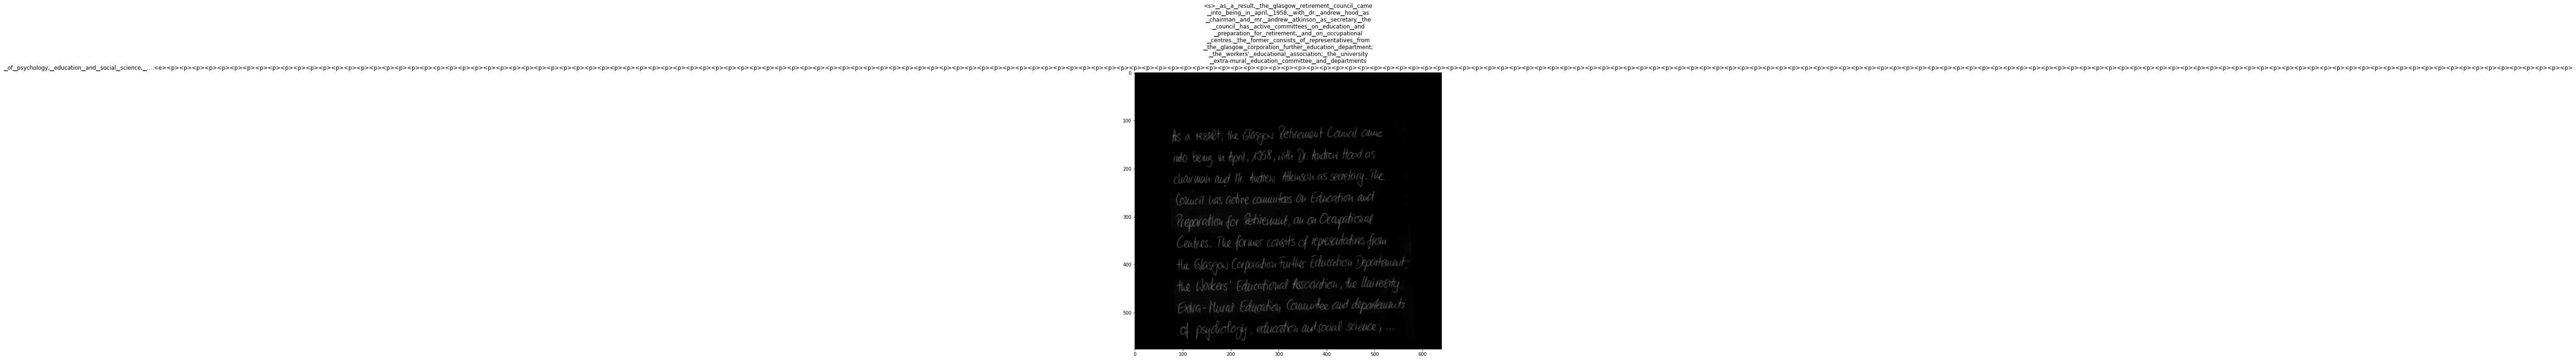

In [54]:
_plot(x[0], vmax=1, title=datamodule.mapping.get_text(y))

In [11]:
import torch.nn.functional as F

In [55]:
xx = F.avg_pool2d(x, kernel_size=2, stride=2)

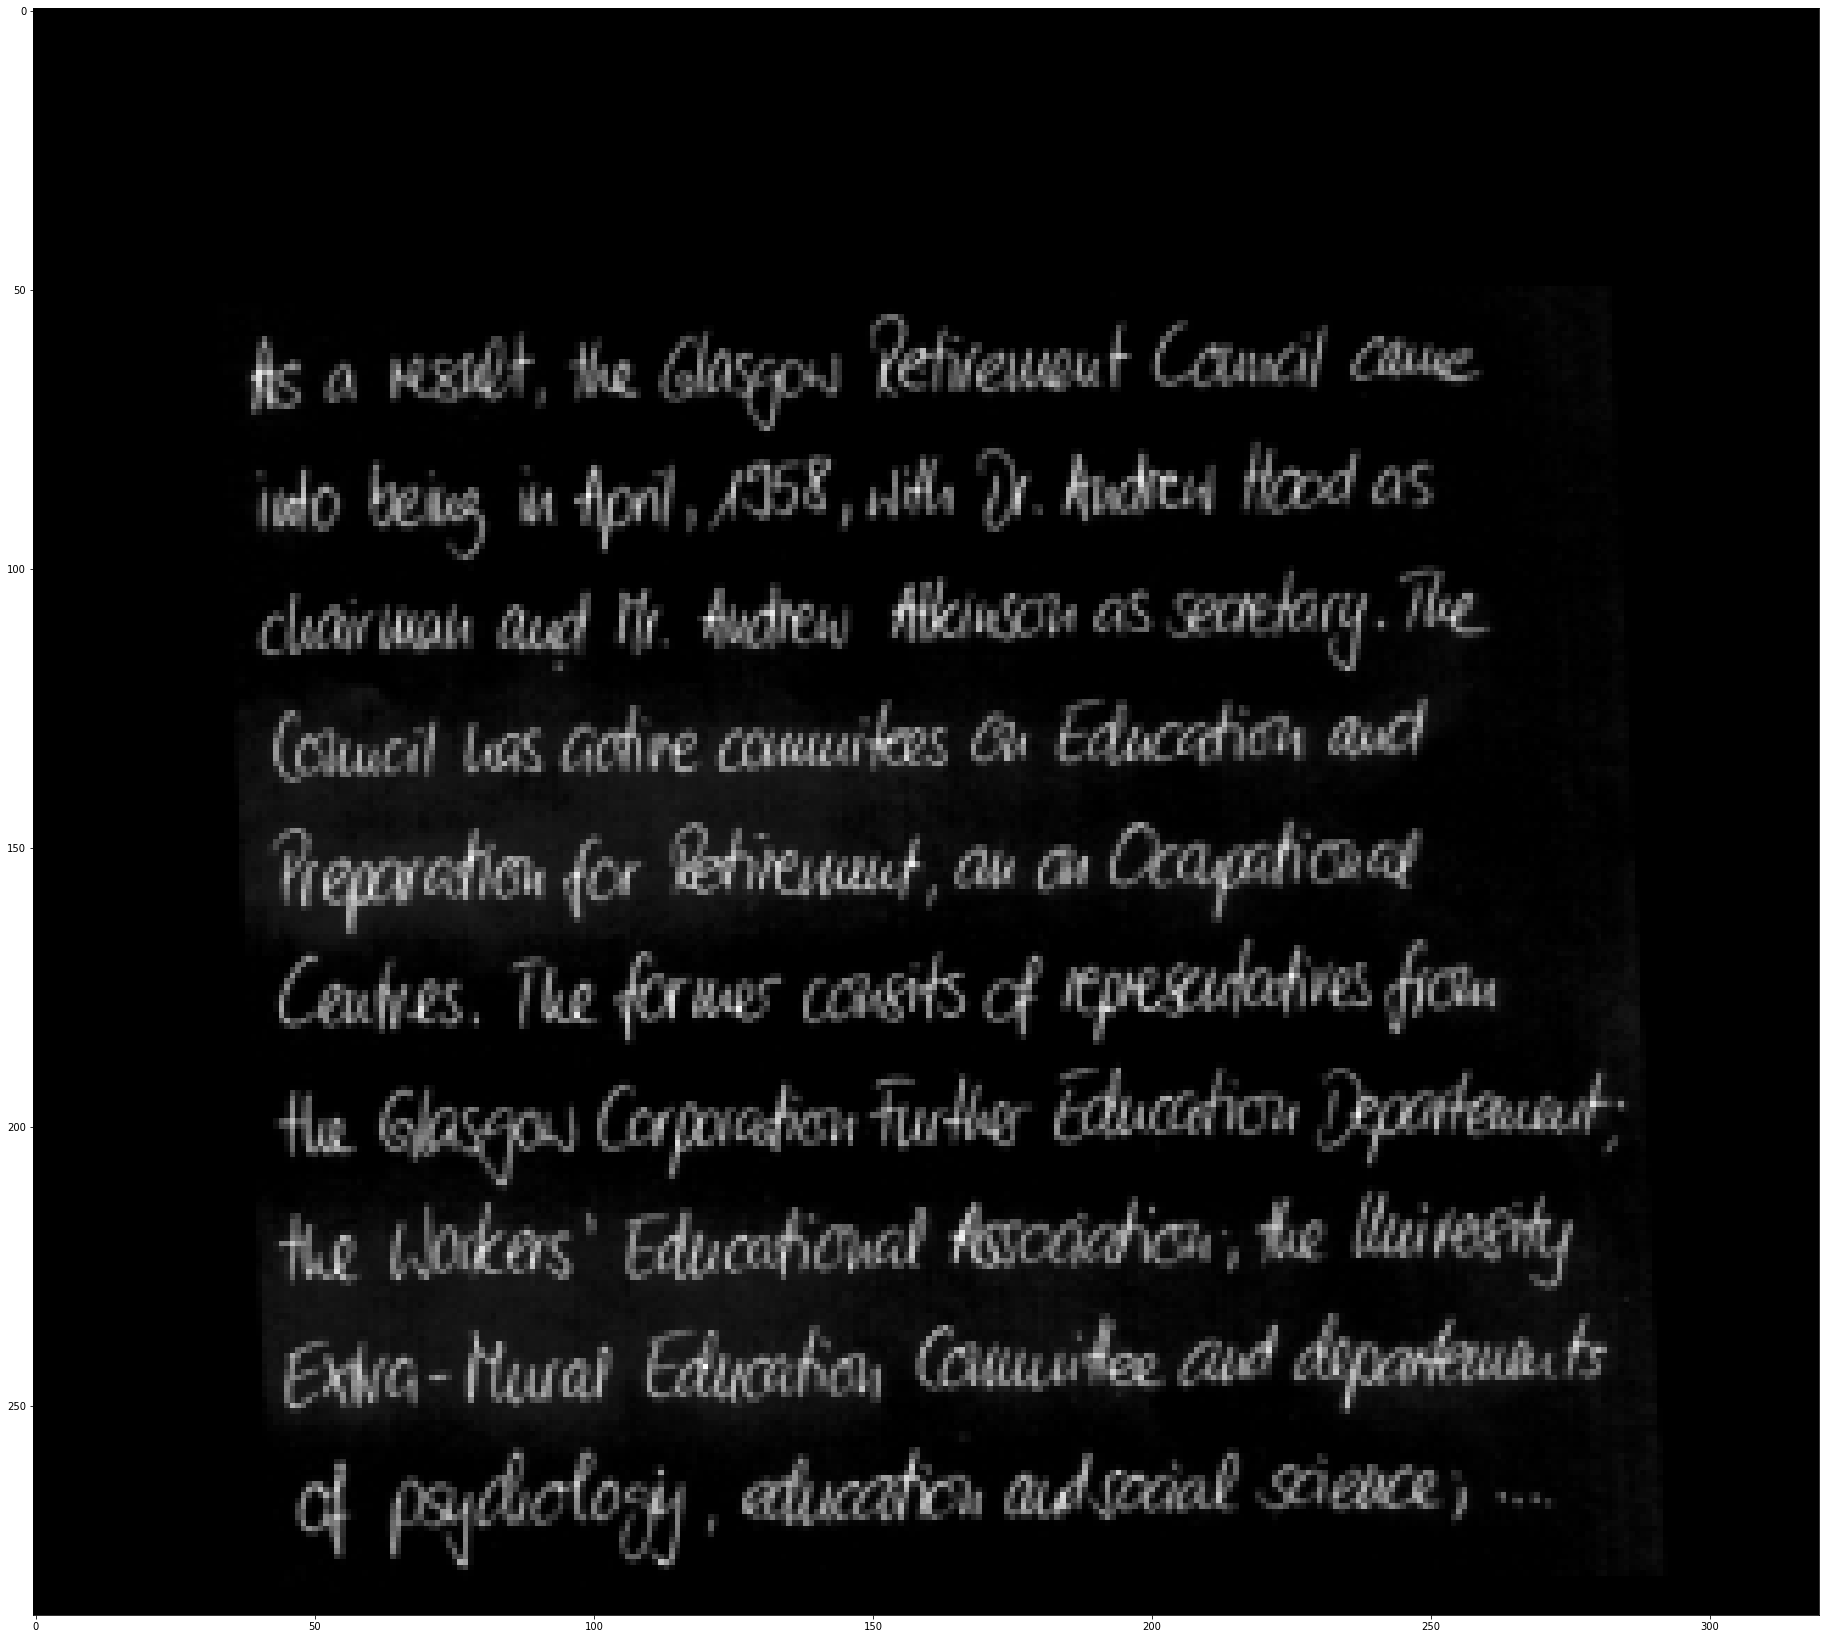

In [56]:
plt.figure(figsize=(32,32))
plt.imshow(xx[0], cmap='gray')

In [ ]:
y[0]

In [ ]:
_plot(x[0, 0], vmax=1, title=convert_y_label_to_string(y[0], datamodule.mapping))

In [ ]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
from einops import rearrange

In [ ]:
x, y = dataset.data_train[2]

In [ ]:
_plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
p = 32
patches = rearrange(x.unsqueeze(0), 'b c (h p1) (w p2) -> b c (h w) p1 p2', p1 = p, p2 = p)

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(15):
    ax = fig.add_subplot(1, 15, i + 1)
    ax.imshow(patches[0, 0, i + 160, :, :].squeeze(0), cmap='gray')

In [ ]:
# Testing

for _ in range(5):
    i = random.randint(0, len(dataset.data_test))
    x, y = dataset.data_test[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
dataset = IAMSyntheticParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

In [ ]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))